#####Mamta Anisa Bella#####
bellagofarsah@gmail.com

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ANTM.JK.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,31319315.0


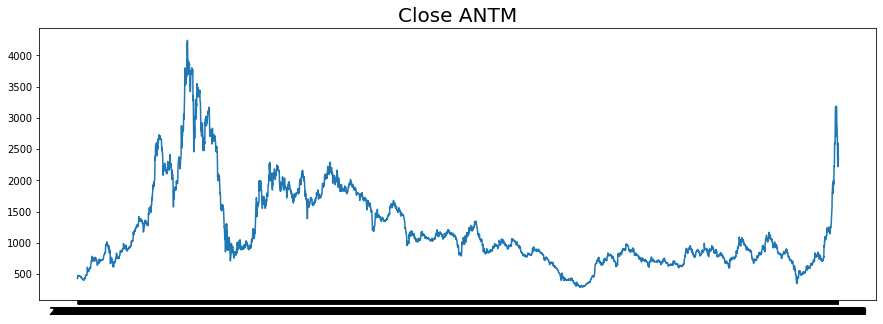

In [3]:
#membuat grafik kolom close
dates = df['Date'].values
volume = df['Close'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, volume)
plt.title('Close ANTM',
          fontsize=20);

In [4]:
#mengubah data kolom close menjadi array dan pembagian data training dan testing
data = df.filter(['Close'])
dataset = data.values
training_data_len = np.ceil( len(dataset) *.8)

In [5]:
#membuat skala data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [7]:
#membuat skala data training
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.03681223, 0.04318393, 0.04636977, 0.04743172, 0.04955562,
       0.04530783, 0.04636977, 0.04530783, 0.04530783, 0.04636977,
       0.04743172, 0.04743172, 0.04743172, 0.04636977, 0.04424588,
       0.04424588, 0.04424588, 0.04106002, 0.04106002, 0.04212197,
       0.03893613, 0.03575028, 0.03681223, 0.03575028, 0.03575028,
       0.03575028, 0.03575028, 0.03362639, 0.03150249, 0.03150249,
       0.02937858, 0.03044053, 0.02937858, 0.03044053, 0.03362639,
       0.03787418, 0.03787418, 0.03787418, 0.03575028, 0.03681223,
       0.04318393, 0.04849367, 0.05061757, 0.05167951, 0.05061757,
       0.05167951, 0.04955562, 0.04955562, 0.06017511, 0.08141409,
       0.08141409, 0.0707946 , 0.06548485, 0.06336096, 0.07185655,
       0.07185655, 0.06760875, 0.0665468 , 0.06973265, 0.06973265])]
[0.07398044966991053]

[array([0.03681223, 0.04318393, 0.04636977, 0.04743172, 0.04955562,
       0.04530783, 0.04636977, 0.04530783, 0.04530783, 0.04636977,
       0.04743172, 0.04743172, 0.04

In [8]:
#mengubah x_train dan y_train menjadi numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#melakukan reshape data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [10]:
#membuat model sequential
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [11]:
#menggunakan learning rate pada optimizer
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=['mae'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
#melatih model
model.fit(x_train, y_train, batch_size=1, epochs=15)

Epoch 1/15
2987/2987 [==============================] - 76s 24ms/step - loss: 0.0110 - mae: 0.1119
Epoch 2/15
2987/2987 [==============================] - 72s 24ms/step - loss: 0.0049 - mae: 0.0756
Epoch 3/15
2987/2987 [==============================] - 72s 24ms/step - loss: 0.0015 - mae: 0.0361
Epoch 4/15
2987/2987 [==============================] - 72s 24ms/step - loss: 7.7460e-04 - mae: 0.0238
Epoch 5/15
2987/2987 [==============================] - 72s 24ms/step - loss: 6.5742e-04 - mae: 0.0222
Epoch 6/15
2987/2987 [==============================] - 74s 25ms/step - loss: 6.2654e-04 - mae: 0.0220
Epoch 7/15
2987/2987 [==============================] - 72s 24ms/step - loss: 6.1487e-04 - mae: 0.0218
Epoch 8/15
2987/2987 [==============================] - 72s 24ms/step - loss: 6.0748e-04 - mae: 0.0216
Epoch 9/15
2987/2987 [==============================] - 72s 24ms/step - loss: 5.9781e-04 - mae: 0.0215
Epoch 10/15
2987/2987 [==============================] - 72s 24ms/step - loss: 5.9039